# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: World Data

## Import Data

In [3]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD
from datetime import timedelta, date, datetime
from urllib.request import urlopen
import json
import plotly.express as px

In [4]:
# import time_series_covid19_confirmed_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

In [5]:
# import time_series_covid19_deaths_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url, error_bad_lines=False)

In [6]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,4,4,4,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [7]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,15,15,18,18,21,23,25,30,30,30
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,23,23,23,23,23,24,25,26,26,26
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,235,256,275,293,313,326,336,348,364,367
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,25,26,26,29,29,31,33,33,35,35
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


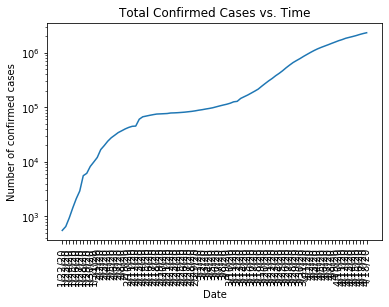

In [8]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

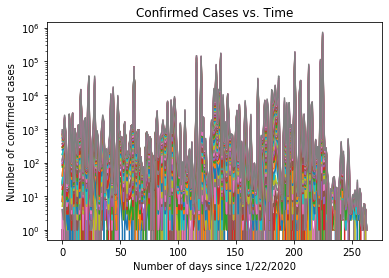

In [9]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

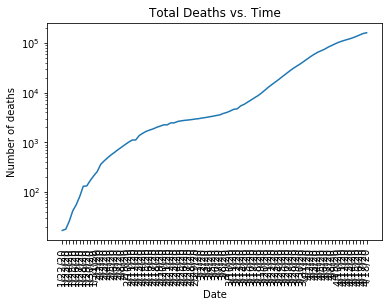

In [10]:
# plot confirmed cases vs. time
plt.title('Total Deaths vs. Time')

plt.plot(deaths.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

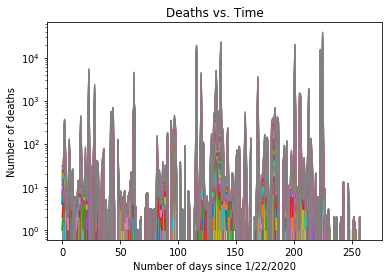

In [11]:
# plot confirmed cases vs. time
plt.title('Deaths vs. Time')

plt.plot(deaths.loc[ :,'1/22/20':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.yscale('log')

plt.show()

## Normalize each location’s time series to account for larger population centers

subtract mean from time series and set variance to one

In [18]:
# Select data with few initial conditions of 0
scaledData = confirmed.loc[:,'3/10/20':] # starting March 10th
scaledData

,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,5,7,7,7,11,16,21,22,22,22,...,484,521,555,607,665,714,784,840,906,933
1,10,12,23,33,38,42,51,55,59,64,...,409,416,433,446,467,475,494,518,539,548
2,20,20,24,26,37,48,54,60,74,87,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,1,1,1,1,1,1,2,39,39,53,...,583,601,601,638,646,659,673,673,696,704
4,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,0,0,0,0,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4
261,0,0,0,0,0,0,0,0,0,0,...,4,4,4,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [19]:
# Convert data to array
scaledData = scaledData.to_numpy()
scaledData

array([[   5,    7,    7, ...,  840,  906,  933],
       [  10,   12,   23, ...,  518,  539,  548],
       [  20,   20,   24, ..., 2268, 2418, 2534],
       ...,
       [   0,    0,    0, ...,    6,    6,    6],
       [   0,    0,    0, ...,    4,    4,    4],
       [   0,    0,    0, ...,    1,    1,    1]], dtype=int64)

## Take DMD

In [21]:
dmd = DMD()
dmd.fit(scaledData)


Eigenvalue (-0.4614468577362549+0j): distance from unit circle 0.7870667974853366
Eigenvalue (-0.07700331336751769+0j): distance from unit circle 0.9940704897304239
Eigenvalue (0.28420378696927895+0.43642284811577164j): distance from unit circle 0.7287633051148388
Eigenvalue (0.28420378696927895-0.43642284811577164j): distance from unit circle 0.7287633051148388
Eigenvalue (0.5017561209625822+0.6108104814090206j): distance from unit circle 0.3751513508774631
Eigenvalue (0.5017561209625822-0.6108104814090206j): distance from unit circle 0.3751513508774631
Eigenvalue (0.9581528151067348+0.32508836468448205j): distance from unit circle 0.023739261950191493
Eigenvalue (0.9581528151067348-0.32508836468448205j): distance from unit circle 0.023739261950191493
Eigenvalue (1.070101814558214+0j): distance from unit circle 0.1451178935207822
Eigenvalue (0.9687282686752292+0.13933021320534644j): distance from unit circle 0.042152633157645614
Eigenvalue (0.9687282686752292-0.13933021320534644j): di

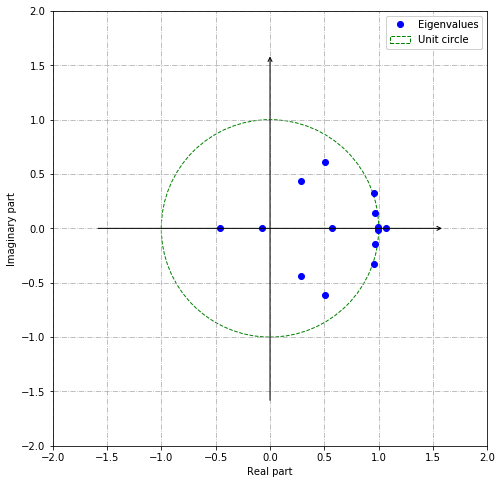

In [22]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

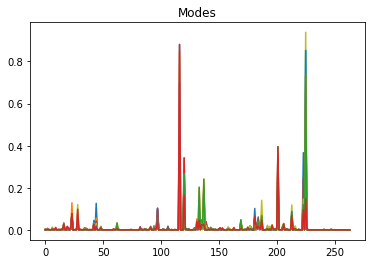

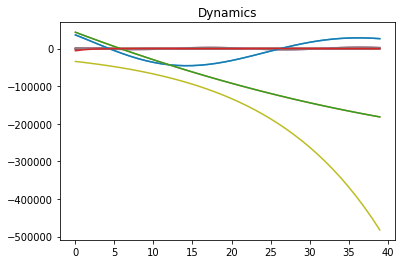

In [23]:
# modes for each date and country
for mode in dmd.modes.T:
    plt.plot(abs(mode.real))
    plt.title('Modes')
plt.show()


for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
plt.show()


In [69]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = confirmed
fig = px.choropleth(df,    locations='Country/Region',  
                           color=abs(mode.real),
                           range_color=(0, 1),
                           scope="world",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()